In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
CARIACO = pd.read_csv("../../DATA/February/HPLC_100m.csv")

In [4]:
CARIACO['date'] = pd.to_datetime(CARIACO['date'])
CARIACO = CARIACO.set_index('date')

In [5]:
CARIACO.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 175 entries, 1995-12-13 to 2017-01-12
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  175 non-null    int64  
 1   Fuco        175 non-null    float64
 2   Perid       144 non-null    float64
 3   Allo        141 non-null    float64
 4   But_fuco    171 non-null    float64
 5   Hex_fuco    174 non-null    float64
 6   Zea         166 non-null    float64
 7   Tot_Chl_b   156 non-null    float64
 8   DP          96 non-null     float64
 9   Tot_Chl_a   165 non-null    float64
 10  TChl        96 non-null     float64
dtypes: float64(10), int64(1)
memory usage: 16.4 KB


In [6]:
pigments = ["Fuco","Perid","Allo","But_fuco","Hex_fuco","Zea","Tot_Chl_b"]

full_cols = ["Date_time_UTC", "depth"] + pigments

datasets = ["BBRS", "MOTE", "HPL", "NGSFC"]

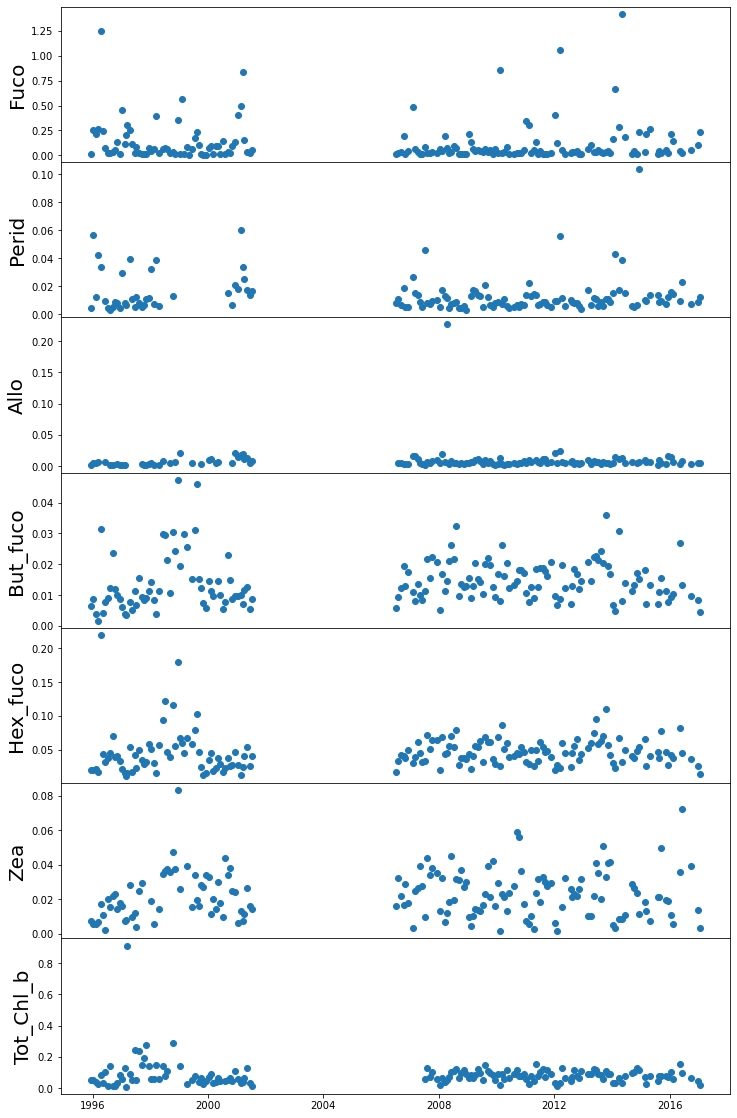

In [7]:
fig, ax = plt.subplots(7,1, figsize=(12,20), sharex=True, sharey=False)

for pig, i in zip(pigments, range(len(pigments))):
    ax[i].scatter(CARIACO.index, CARIACO[pig])
    ax[i].set_ylabel(pig, fontsize=20)
    
plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig("HPLC_SizePigment_RawIntegrated100m.png")

In [8]:
CARIACO.Perid * CARIACO.Allo

date
1995-12-13    0.000011
1996-01-12    0.000245
1996-02-13    0.000062
1996-03-13    0.000282
1996-04-16         NaN
                ...   
2016-05-11    0.000038
2016-06-07    0.000194
2016-09-20    0.000020
2016-12-21    0.000048
2017-01-12    0.000056
Length: 175, dtype: float64

In [9]:
DP = 1.41 * CARIACO.Fuco + 1.41 * CARIACO.Perid + 0.60 * CARIACO.Allo + \
        0.35 * CARIACO.But_fuco + 1.27 * CARIACO.Hex_fuco + 0.86 * CARIACO.Zea + 1.01 * CARIACO.Tot_Chl_b

<AxesSubplot:xlabel='date'>

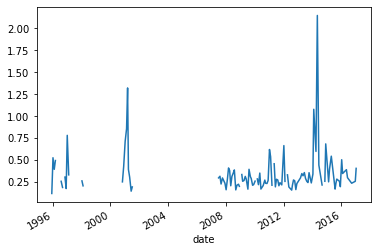

In [10]:
DP.plot()

<AxesSubplot:xlabel='date'>

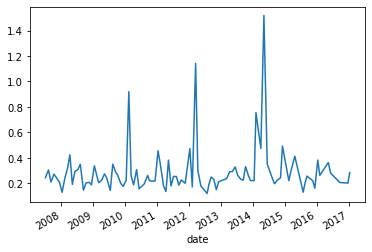

In [11]:
CARIACO.DP.plot()

In [12]:
micro = (1.41 * CARIACO.Fuco + 1.41 * CARIACO.Perid) / DP
nano = (0.6 * CARIACO.Allo + 0.35 * CARIACO.But_fuco + 1.27 * CARIACO.Hex_fuco) / DP
pico = (0.86 * CARIACO.Zea + 1.01 * CARIACO.Tot_Chl_b) / DP

In [13]:
micro_monthly = micro.resample('M').mean()
micro_yearly = micro.resample('Y').mean()

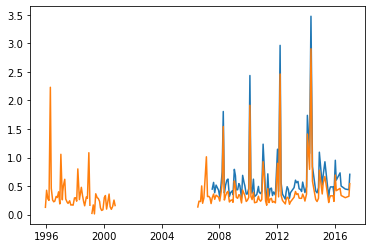

In [14]:
plt.plot(CARIACO.TChl)
plt.plot(CARIACO.Tot_Chl_a)

In [147]:
micro.index.year

Int64Index([1995, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996,
            ...
            2015, 2015, 2015, 2016, 2016, 2016, 2016, 2016, 2016, 2017],
           dtype='int64', name='date', length=175)

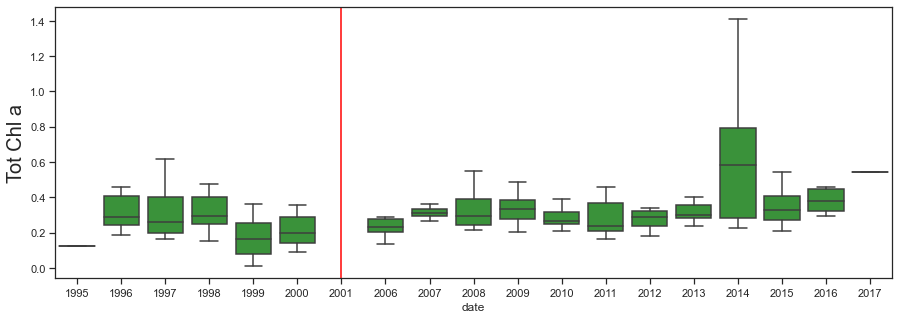

In [157]:

seaborn.boxplot(x=micro.index.year, y=CARIACO.Tot_Chl_a, color='tab:green', showfliers=False)
plt.axvline(6, color='red')
plt.ylabel("Tot Chl a", fontsize=20)

plt.savefig("HPLC_TotChla_RawAvg100m.png")

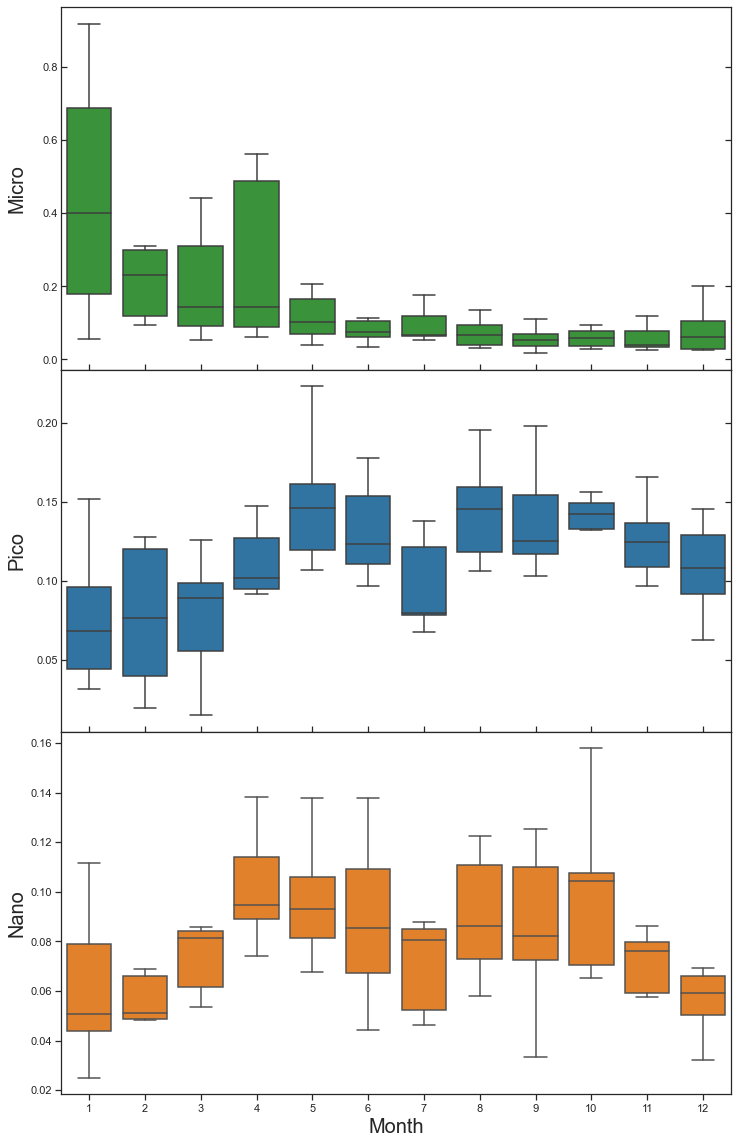

In [16]:
import seaborn
seaborn.set(style="ticks", color_codes=True)

labels = ['Micro', 'Pico', 'Nano']

fig, ax = plt.subplots(3,1, figsize=(12,20), sharex=True, sharey=False)
seaborn.boxplot(x=micro.index.month, y=micro /(micro+nano+pico) * CARIACO.Tot_Chl_a, ax=ax[0], color='tab:green', showfliers=False)
seaborn.boxplot(x=micro.index.month, y=pico /(micro+nano+pico) * CARIACO.Tot_Chl_a, ax=ax[1], color='tab:blue', showfliers=False)
seaborn.boxplot(x=micro.index.month, y=nano /(micro+nano+pico) * CARIACO.Tot_Chl_a, ax=ax[2], color='tab:orange', showfliers=False)

for axx in ax[0:2]:
    axx.set_xlabel("")
    axx.tick_params(top=False, right=True, direction="in")
    
for axx, ylab in zip(ax, labels):
    axx.set_ylabel(ylab, fontsize=20)
    #axx.set_yscale('log')

ax[2].set_xlabel("Month", fontsize=20)
    
plt.subplots_adjust(wspace=0, hspace=0)
fig.align_ylabels()
plt.show()

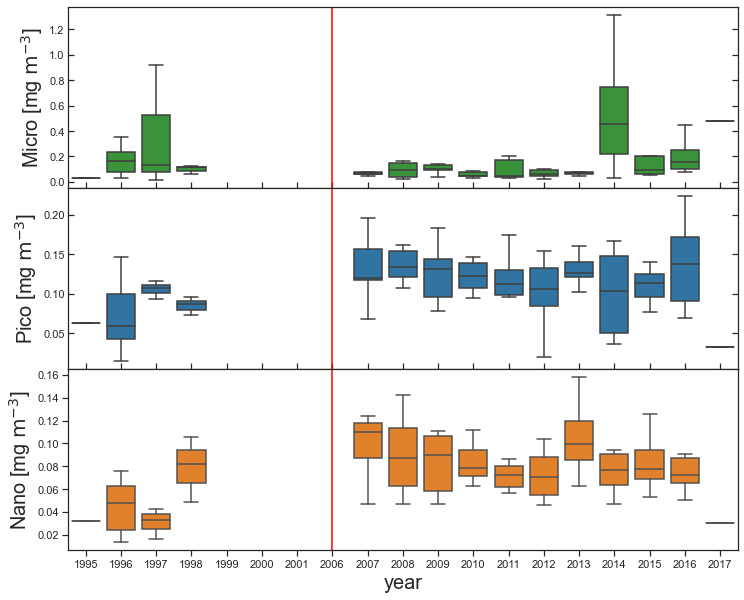

In [172]:
fig, ax = plt.subplots(3,1, figsize=(12,10), sharex=True, sharey=False)
#seaborn.boxplot(x=micro.index.year, y=micro /(micro+nano+pico) * CARIACO.Tot_Chl_a, color='tab:green')

seaborn.set(style="ticks", color_codes=True)

labels = ['Micro [mg $\mathrm{m}^{-3}$]', 'Pico [mg $\mathrm{m}^{-3}$]', 'Nano [mg $\mathrm{m}^{-3}$]']

seaborn.boxplot(x=micro.index.year, y=micro/(micro+nano+pico) * CARIACO.Tot_Chl_a, ax=ax[0], color='tab:green', showfliers=False)
seaborn.boxplot(x=micro.index.year, y=pico/(micro+nano+pico) * CARIACO.Tot_Chl_a, ax=ax[1], color='tab:blue', showfliers=False)
seaborn.boxplot(x=micro.index.year, y=nano/(micro+nano+pico) * CARIACO.Tot_Chl_a, ax=ax[2], color='tab:orange',showfliers=False)


for axx in ax[0:2]:
    axx.set_xlabel("")
    axx.tick_params(top=False, right=True, direction="in")
    
for axx, ylab in zip(ax, labels):
    axx.set_ylabel(ylab, fontsize=20)

ax[2].set_xlabel("year", fontsize=20)
    
plt.subplots_adjust(wspace=0, hspace=0)
#plt.gca().set_yscale('log')
ax[0].axvline(7, color='red')

ax[1].axvline(7, color='red')

ax[2].axvline(7, color='red')

plt.savefig("HPLC_SIZE_totalvals_RawAvg100m.png")

<AxesSubplot:xlabel='date'>

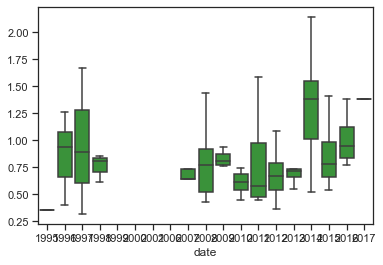

In [24]:
#fig, ax = plt.subplots(3,1, figsize=(12,10), sharex=True, sharey=False)
#seaborn.boxplot(x=micro.index.year, y=micro /(micro+nano+pico) * CARIACO.Tot_Chl_a, color='tab:green')

seaborn.boxplot(x=micro.index.year, y=np.log10(micro/(micro+nano+pico) * CARIACO.Tot_Chl_a * 50 + pico/(micro+nano+pico) * CARIACO.Tot_Chl_a * 10 + nano/(micro+nano+pico) * CARIACO.Tot_Chl_a * 1), color='tab:green', showfliers=False)
#seaborn.boxplot(x=micro.index.year, y=pico/(micro+nano+pico) * CARIACO.Tot_Chl_a * 10, ax=ax[1], color='tab:blue', showfliers=False)
#seaborn.boxplot(x=micro.index.year, y=nano/(micro+nano+pico) * CARIACO.Tot_Chl_a * 1, ax=ax[2], color='tab:orange',showfliers=False)
#plt.scale_y_log10()

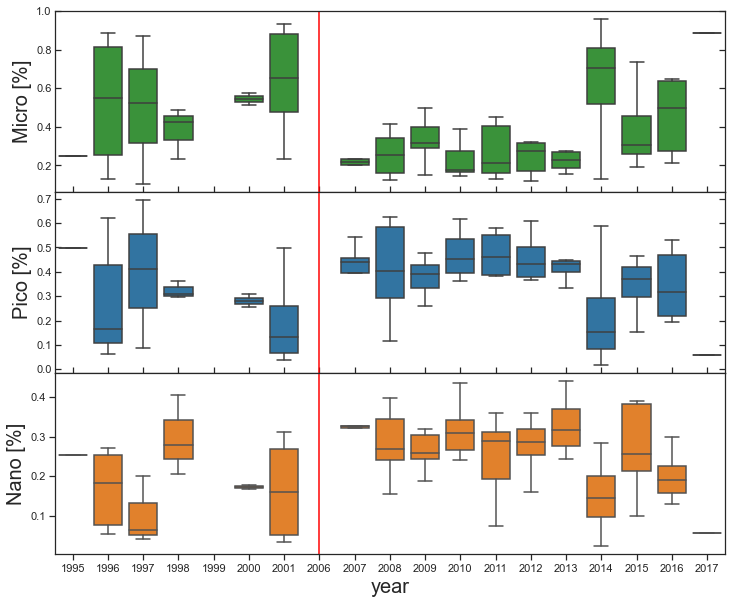

In [171]:
fig, ax = plt.subplots(3,1, figsize=(12,10), sharex=True, sharey=False)
#seaborn.boxplot(x=micro.index.year, y=micro /(micro+nano+pico) * CARIACO.Tot_Chl_a, color='tab:green')

seaborn.set(style="ticks", color_codes=True)

labels = ['Micro [%]', 'Pico [%]', 'Nano [%]']

seaborn.boxplot(x=micro.index.year, y=micro/(micro+nano+pico), ax=ax[0], color='tab:green', showfliers=False)
seaborn.boxplot(x=micro.index.year, y=pico/(micro+nano+pico), ax=ax[1], color='tab:blue', showfliers=False)
seaborn.boxplot(x=micro.index.year, y=nano/(micro+nano+pico), ax=ax[2], color='tab:orange',showfliers=False)


for axx in ax[0:2]:
    axx.set_xlabel("")
    axx.tick_params(top=False, right=True, direction="in")
    
for axx, ylab in zip(ax, labels):
    axx.set_ylabel(ylab, fontsize=20)

ax[2].set_xlabel("year", fontsize=20)
    
plt.subplots_adjust(wspace=0, hspace=0)
#plt.gca().set_yscale('log')
ax[0].axvline(7, color='red')

ax[1].axvline(7, color='red')

ax[2].axvline(7, color='red')


plt.savefig("HPLC_SIZE_relativevals_RawAvg100m.png")

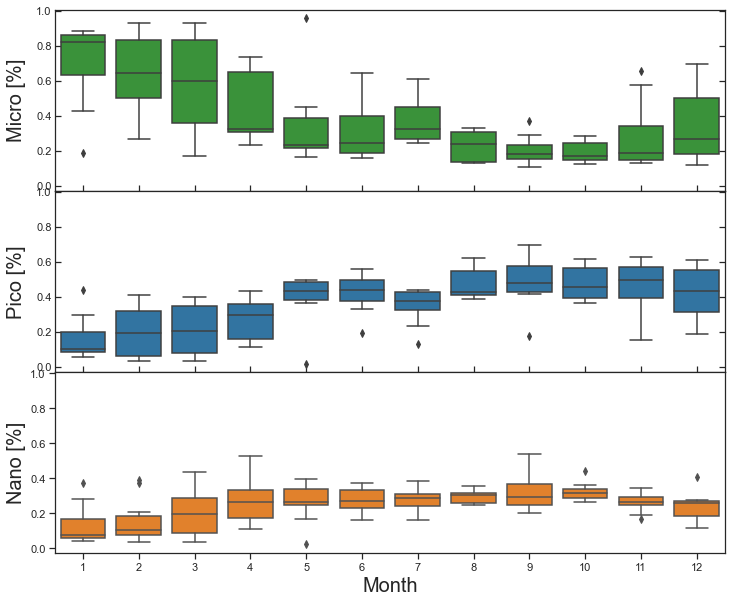

In [181]:
import seaborn
seaborn.set(style="ticks", color_codes=True)

labels = ['Micro [%]', 'Pico [%]', 'Nano [%]']

fig, ax = plt.subplots(3,1, figsize=(12,10), sharex=True, sharey=True)
seaborn.boxplot(x=micro.index.month, y=micro/(micro+nano+pico), ax=ax[0], color='tab:green')
seaborn.boxplot(x=micro.index.month, y=pico/(micro+nano+pico), ax=ax[1], color='tab:blue')
seaborn.boxplot(x=micro.index.month, y=nano/(micro+nano+pico), ax=ax[2], color='tab:orange')

for axx in ax[0:2]:
    axx.set_xlabel("")
    axx.tick_params(top=False, right=True, direction="in")
    
for axx, ylab in zip(ax, labels):
    axx.set_ylabel(ylab, fontsize=20)

ax[2].set_xlabel("Month", fontsize=20)
    
plt.subplots_adjust(wspace=0, hspace=0)
fig.align_ylabels()
#plt.show()


plt.savefig("HPLC_SIZE_relativevals_SEASONALITY_RawAvg100m.png")

<BarContainer object of 175 artists>

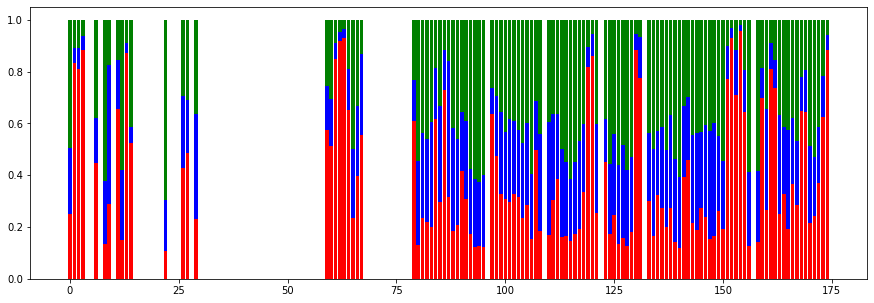

In [66]:
plt.rcParams['figure.figsize'] = [15, 5]

plt.bar(range(len(micro.index)), height=micro/(micro+nano+pico), color='r')

plt.bar(range(len(micro.index)), height=nano/(micro+nano+pico), bottom=micro/(micro+nano+pico), color='b')

plt.bar(range(len(micro.index)), height=pico/(micro+nano+pico), bottom=micro+nano/(micro+nano+pico), color='g')

#plt.gca().xaxis_date()

In [41]:
range(len(micro.index))

range(0, 175)

<BarContainer object of 175 artists>

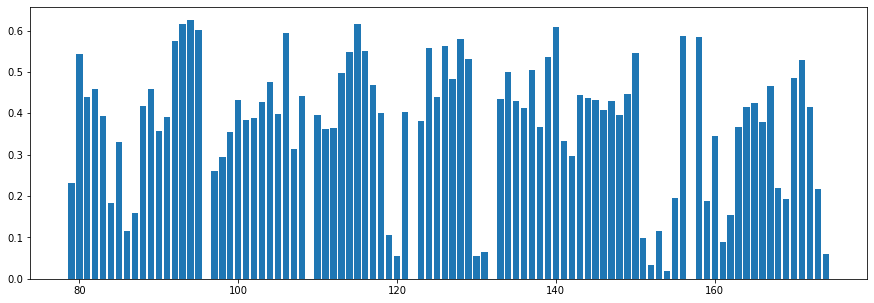

In [61]:
plt.bar(range(len(pico.index)), height=pico/(micro+nano+pico)), bottom=micro+nano/(micro+nano+pico), color='g')

# check other depth intervals

In [177]:
CARIACO_2 = pd.read_csv("../../DATA/February/HPLC_55to100m.csv")

CARIACO_2['date'] = pd.to_datetime(CARIACO_2['date'])
CARIACO_2 = CARIACO_2.set_index('date')

In [178]:
DP_2 = 1.41 * CARIACO_2.Fuco + 1.41 * CARIACO_2.Perid + 0.60 * CARIACO_2.Allo + \
        0.35 * CARIACO_2.But_fuco + 1.27 * CARIACO_2.Hex_fuco + 0.86 * CARIACO_2.Zea + 1.01 * CARIACO_2.Tot_Chl_b

micro_2 = (1.41 * CARIACO_2.Fuco + 1.41 * CARIACO_2.Perid) / DP_2
nano_2 = (0.6 * CARIACO_2.Allo + 0.35 * CARIACO_2.But_fuco + 1.27 * CARIACO_2.Hex_fuco) / DP_2
pico_2 = (0.86 * CARIACO_2.Zea + 1.01 * CARIACO_2.Tot_Chl_b) / DP_2

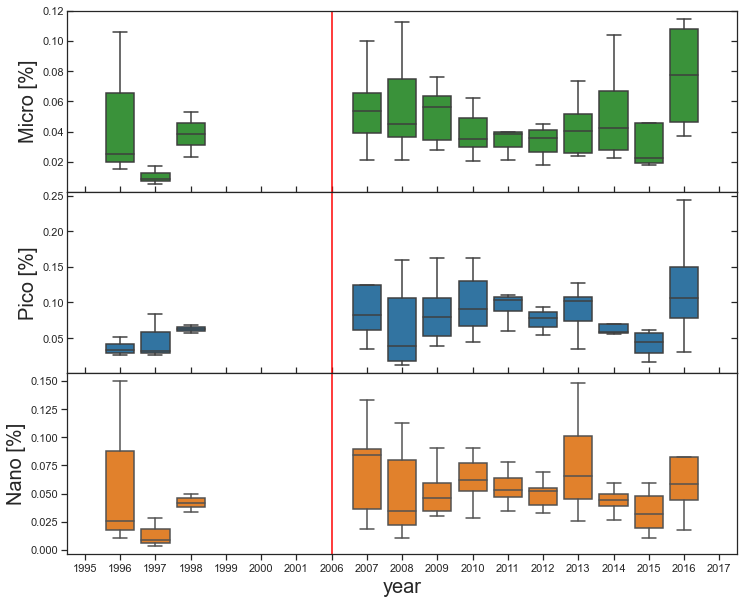

In [180]:
fig, ax = plt.subplots(3,1, figsize=(12,10), sharex=True, sharey=False)
#seaborn.boxplot(x=micro.index.year, y=micro /(micro+nano+pico) * CARIACO.Tot_Chl_a, color='tab:green')

seaborn.set(style="ticks", color_codes=True)

labels = ['Micro [%]', 'Pico [%]', 'Nano [%]']

seaborn.boxplot(x=micro_2.index.year, y=micro_2/(micro_2+nano_2+pico_2)* CARIACO_2.Tot_Chl_a, ax=ax[0], color='tab:green', showfliers=False)
seaborn.boxplot(x=micro_2.index.year, y=pico_2/(micro_2+nano_2+pico_2)* CARIACO_2.Tot_Chl_a, ax=ax[1], color='tab:blue', showfliers=False)
seaborn.boxplot(x=micro_2.index.year, y=nano_2/(micro_2+nano_2+pico_2)* CARIACO_2.Tot_Chl_a, ax=ax[2], color='tab:orange',showfliers=False)


for axx in ax[0:2]:
    axx.set_xlabel("")
    axx.tick_params(top=False, right=True, direction="in")
    
for axx, ylab in zip(ax, labels):
    axx.set_ylabel(ylab, fontsize=20)

ax[2].set_xlabel("year", fontsize=20)
    
plt.subplots_adjust(wspace=0, hspace=0)
#plt.gca().set_yscale('log')
ax[0].axvline(7, color='red')

ax[1].axvline(7, color='red')

ax[2].axvline(7, color='red')


#plt.savefig("HPLC_SIZE_relativevals_RawAvg100m.png")